In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
diamonds_url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
diamonds_df = pd.read_csv(diamonds_url)
display(diamonds_df.head())

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
print(diamonds_df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [4]:
display(diamonds_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


None

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


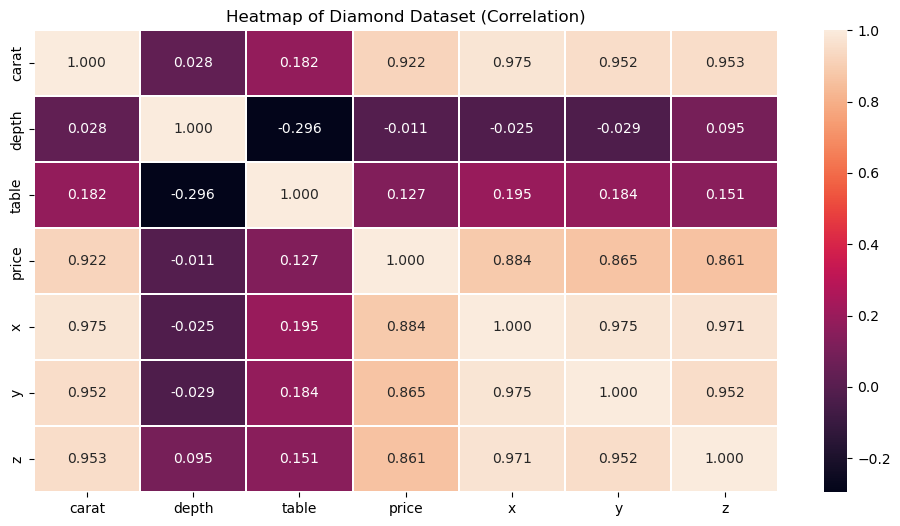

In [5]:
#Numerical columns from the DataFrame to show correlation
number_columns = diamonds_df.select_dtypes(include='number')

#compute the correlation matrix
correlation_matrix_df = number_columns.corr()
display(correlation_matrix_df)

# Create a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix_df, annot=True, fmt=".3f", linewidths=0.3)
plt.title("Heatmap of Diamond Dataset (Correlation)")
plt.show()

Based on the correlation matrix, we select carat, x, y, and z for regression as they show strong correlation with the target feature price, indicating their relevance. However, due to multicollinearity among these features, we can improve model stability by retaining only carat and dropping x, y and z as they are highly correlated with both carat and each other.

#### Distribution of numeric columns (carat, x, y, z, depth, table, price)

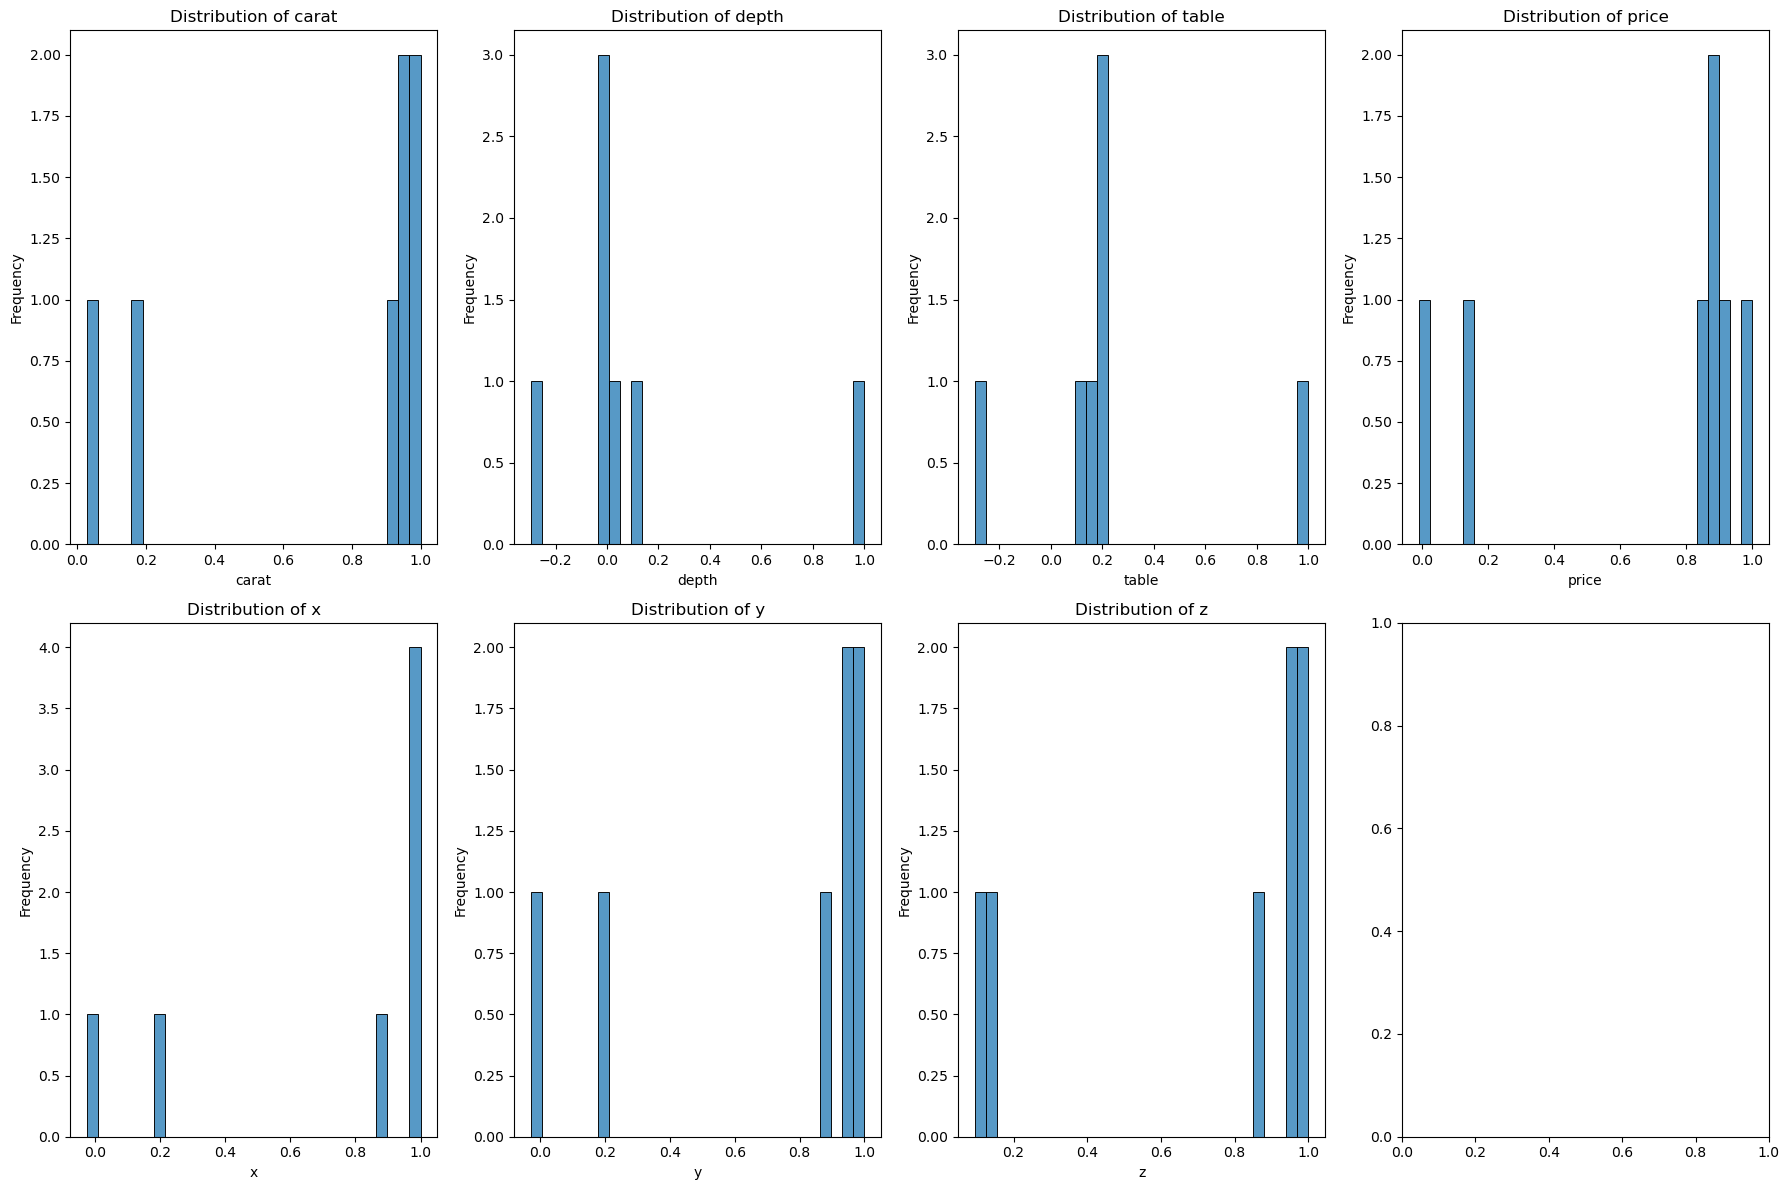

In [8]:
# Get numerical columns
numeric_columns = correlation_matrix_df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 12), sharex=False, sharey=False)

for ax, col in zip(axes.flatten(), numeric_columns):
    sns.histplot(correlation_matrix_df[col], ax=ax,  bins=30)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()



#### Feature Selection and Preprocessing* 
Based on correlations and domain knowledge, we select carat, x, y, and z as predictor  and drop irrelevant or redundant features
* 
Outliers (e.g., zero dimensions for x, y, z) are removed to improve model performance.

In [10]:
# Dropping outliners from x, y and z
# Remove rows where x, y, z dimensions have zero or very low values
diamonds_df = diamonds_df[(diamonds_df[['x', 'y', 'z']] > 0).all(axis=1)]

#### Data SplittingThe dataset is divided into training and testing subsets, ensuring that the model is trained on one portion of the data and evaluated on unseen data. This approach prevents overfitting and provides a realistic assessment of the model's predictive performance..

In [12]:
# Define features and target
X = diamonds_df[['carat', 'x', 'y', 'z']]
y = diamonds_df['price']                 

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Model Pipeline - Linear Regression 


In [14]:

# Create a pipeline for scaling and training
lr_pipeline = Pipeline([('scaler', StandardScaler()),('regressor', LinearRegression())])

# Train the pipeline
lr_pipeline.fit(X_train, y_train)
# Predictions
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2 = r2_score(y_test, y_pred_lr)

# Calculate MAE%
mean_actual = np.mean(y_test)
mae_percent = (mae / mean_actual) * 100

# Print results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-Squared: {r2}")
print(f"Mean Absolute Error Percentage (MAE%): {mae_percent:.2f}%")
print(f"Linear Regression - MSE: {rmse:.2f}, R^2: {r2:.2f}")

Mean Absolute Error (MAE): 885.8282461343879
Root Mean Squared Error (RMSE): 1594.94604321401
R-Squared: 0.8413260555788378
Mean Absolute Error Percentage (MAE%): 22.43%
Linear Regression - MSE: 1594.95, R^2: 0.84


#### Model Comparison and Reporting
The performance of both models is evaluated using metrics such as Mean Squared Error (MSE) and R^2, which measure prediction accuracy and explained variance, respectively.
Results are compared to identify the better-performing model, and predictions are visualized to understand the alignment between actual and predicted values.

,Model,MSE,R^2
0,Linear Regression,1594.946043,0.841326


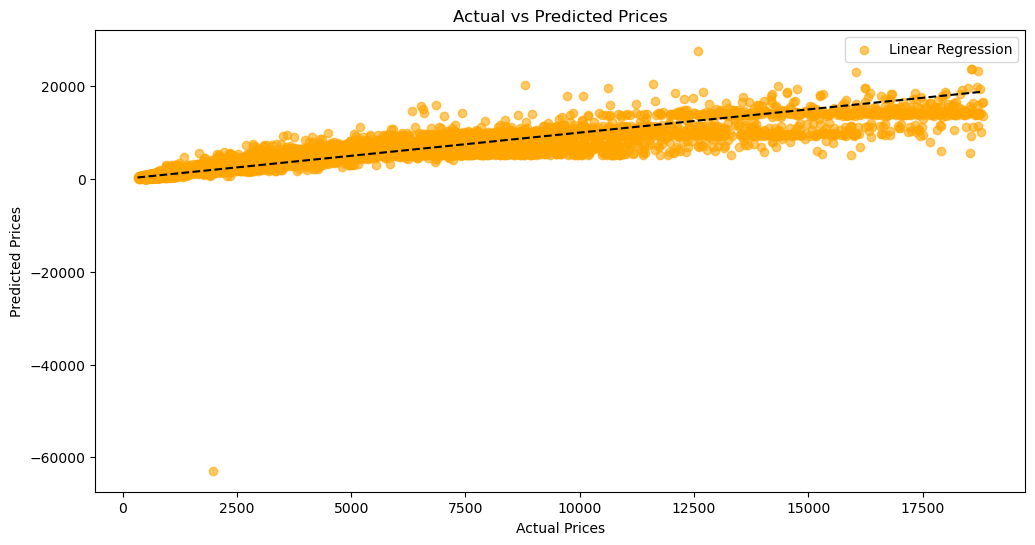

In [21]:
# Comparison Table
results = pd.DataFrame({
    'Model': ['Linear Regression'],
    'MSE': [rmse],
    'R^2': [r2]
})
display(results)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='black')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()


#### Calculating and Plotting Residuals

Mean Absolute Error (MAE): 885.83
Root Mean Squared Error (RMSE): 1594.95
R-Squared: 0.84

Residuals Summary:
Mean of Residuals: 15.31
Standard Deviation of Residuals: 1594.87


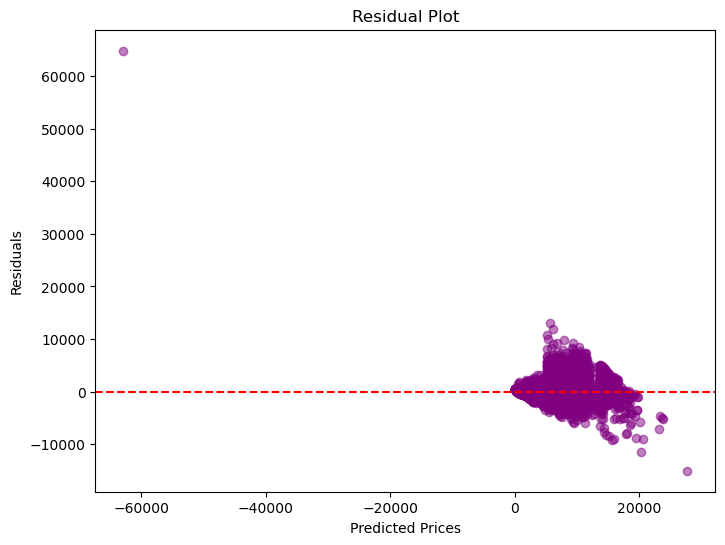

In [30]:
# Visualize the residuals
residuals = y_test - y_pred_lr

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Residual analysis: Summary statistics
print("\nResiduals Summary:")
print(f"Mean of Residuals: {np.mean(residuals):.2f}")
print(f"Standard Deviation of Residuals: {np.std(residuals):.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_lr, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()